In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
from sklearn.preprocessing import LabelEncoder

# Identify the columns with string values and convert them to numerical representations
label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']  # Replace with the actual column names
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


data.head(100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6300000,4100,3,2,3,1,0,0,0,1,2,0,1
96,6300000,9000,3,1,1,1,0,1,0,0,1,1,0
97,6300000,6400,3,1,1,1,1,1,0,1,1,1,1
98,6293000,6600,3,2,3,1,0,0,0,1,0,1,2


In [4]:
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0


In [6]:
zero_columns = (data == 0).any()
zero_columns = zero_columns[zero_columns].index.tolist()
print(zero_columns)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [7]:
data_copy = data.copy(deep=True)
data_copy[zero_columns] = data_copy[zero_columns].replace(0, np.NaN)
data_copy.isnull().sum()

price                 0
area                  0
bedrooms              0
bathrooms             0
stories               0
mainroad             77
guestroom           448
basement            354
hotwaterheating     520
airconditioning     373
parking             299
prefarea            417
furnishingstatus    140
dtype: int64

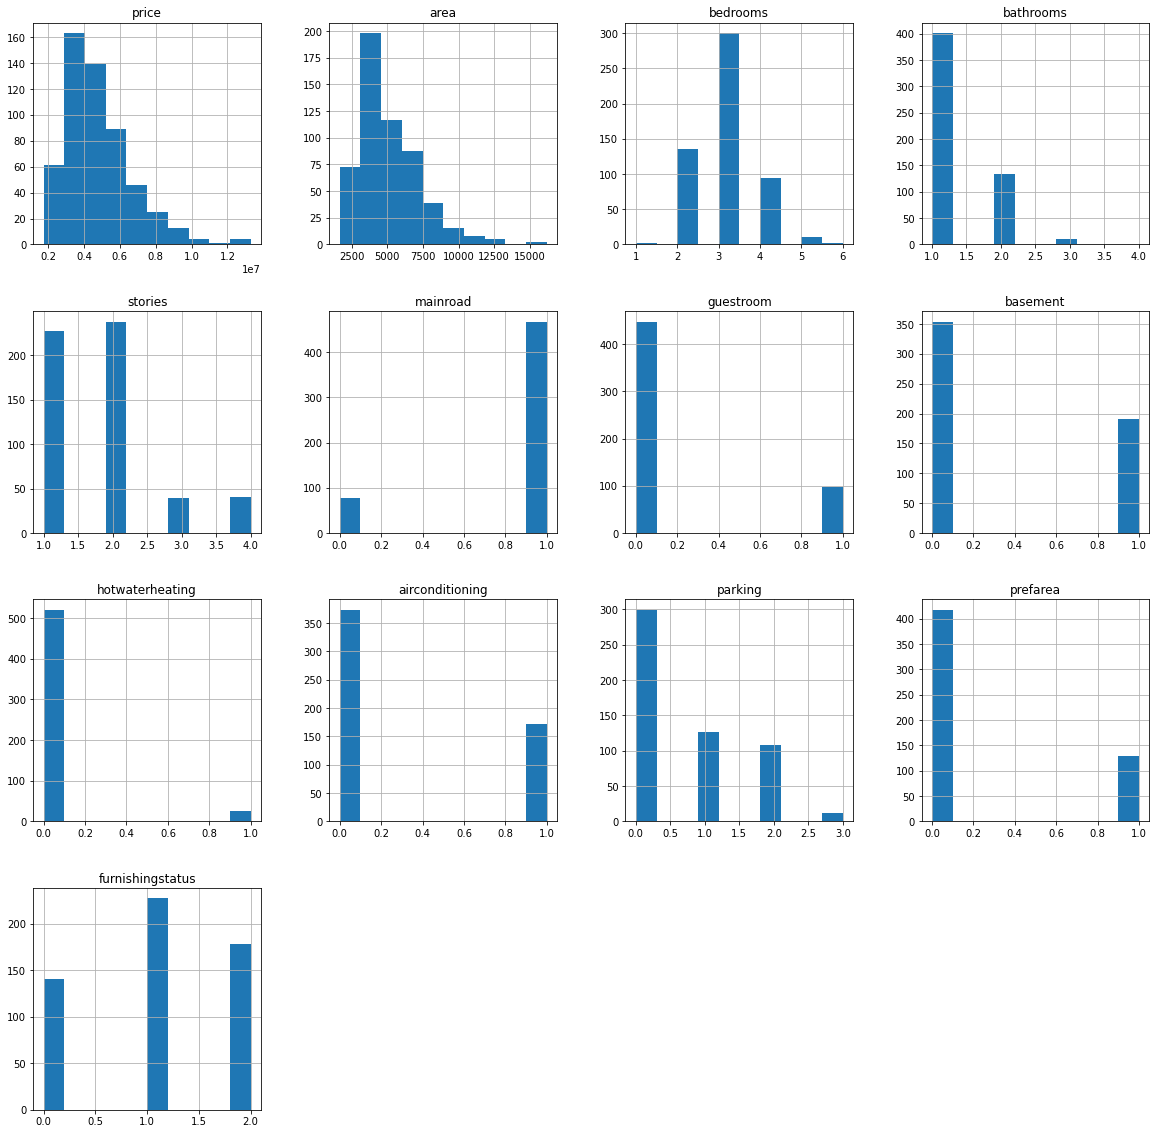

In [10]:
p = data.hist(figsize = (20,20))

In [11]:
data_copy['mainroad'].fillna(data_copy['mainroad'].mean(), inplace = True)
data_copy['guestroom'].fillna(data_copy['guestroom'].mean(), inplace = True)
data_copy['basement'].fillna(data_copy['basement'].median(), inplace = True)
data_copy['hotwaterheating'].fillna(data_copy['hotwaterheating'].median(), inplace = True)
data_copy['airconditioning'].fillna(data_copy['airconditioning'].median(), inplace = True)
data_copy['parking'].fillna(data_copy['parking'].mean(), inplace = True)
data_copy['prefarea'].fillna(data_copy['prefarea'].mean(), inplace = True)
data_copy['furnishingstatus'].fillna(data_copy['furnishingstatus'].median(), inplace = True)

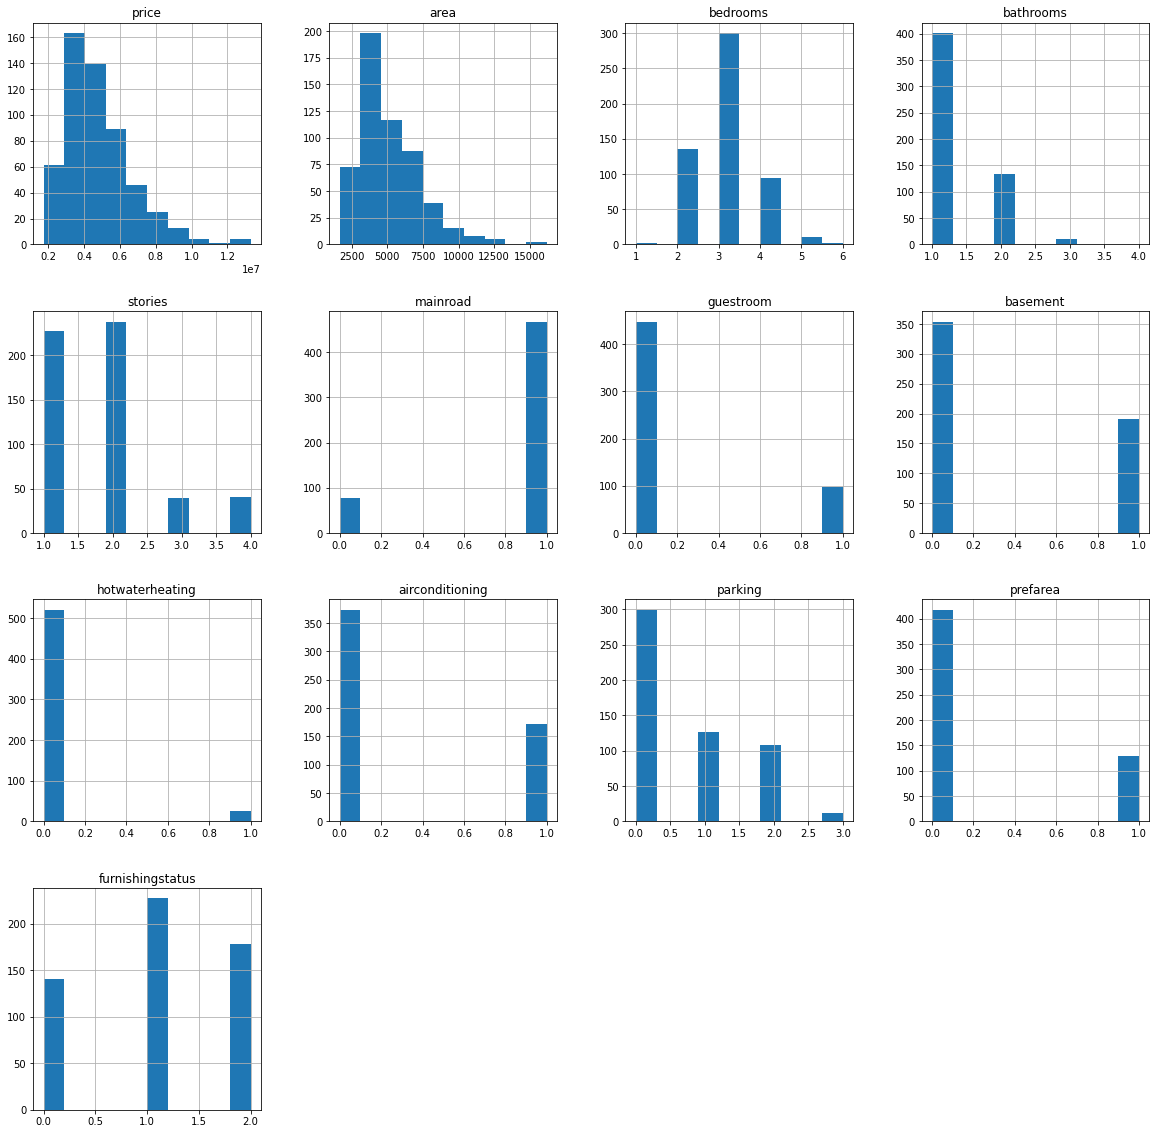

In [12]:
p = data.hist(figsize = (20,20))

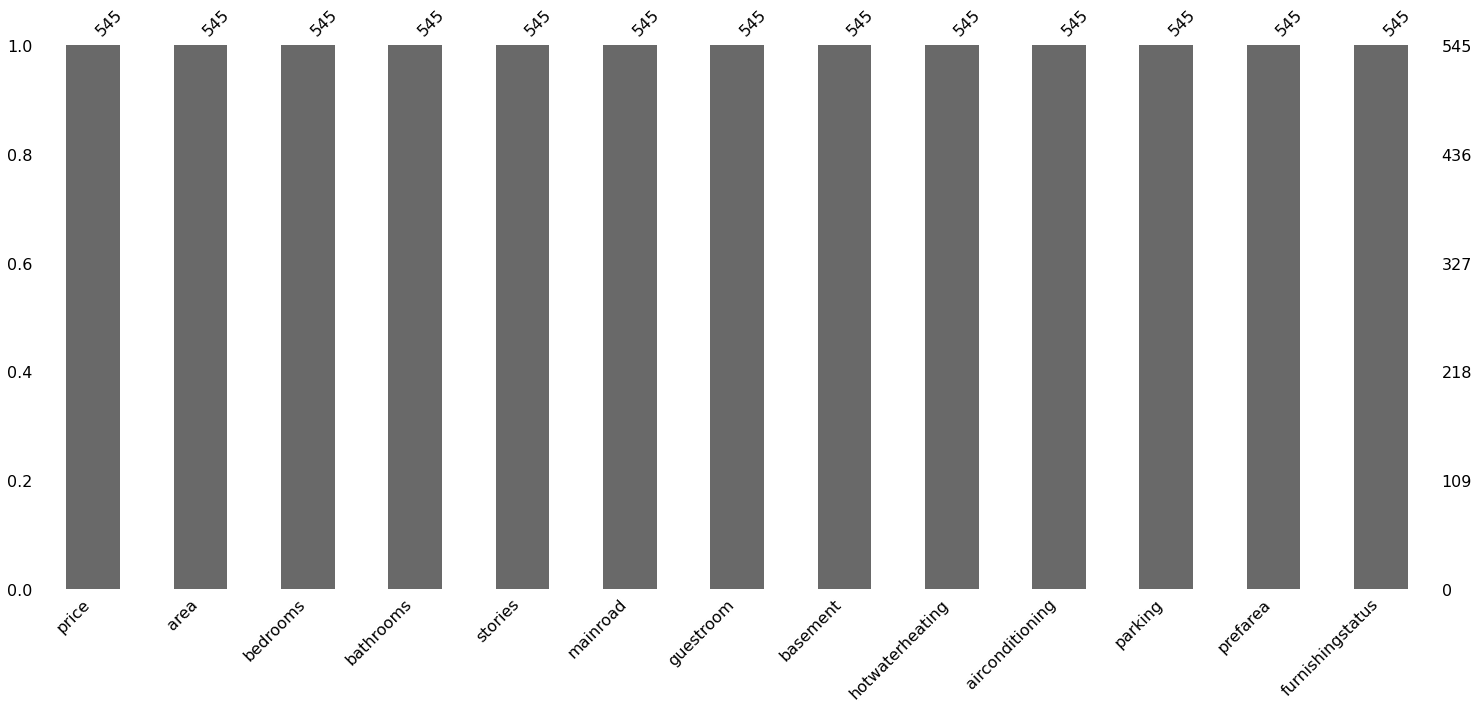

In [13]:
import missingno as msno
p = msno.bar(data)

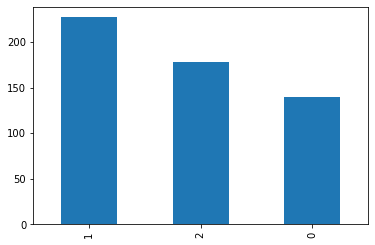

In [14]:
p=data.furnishingstatus.value_counts().plot(kind="bar")

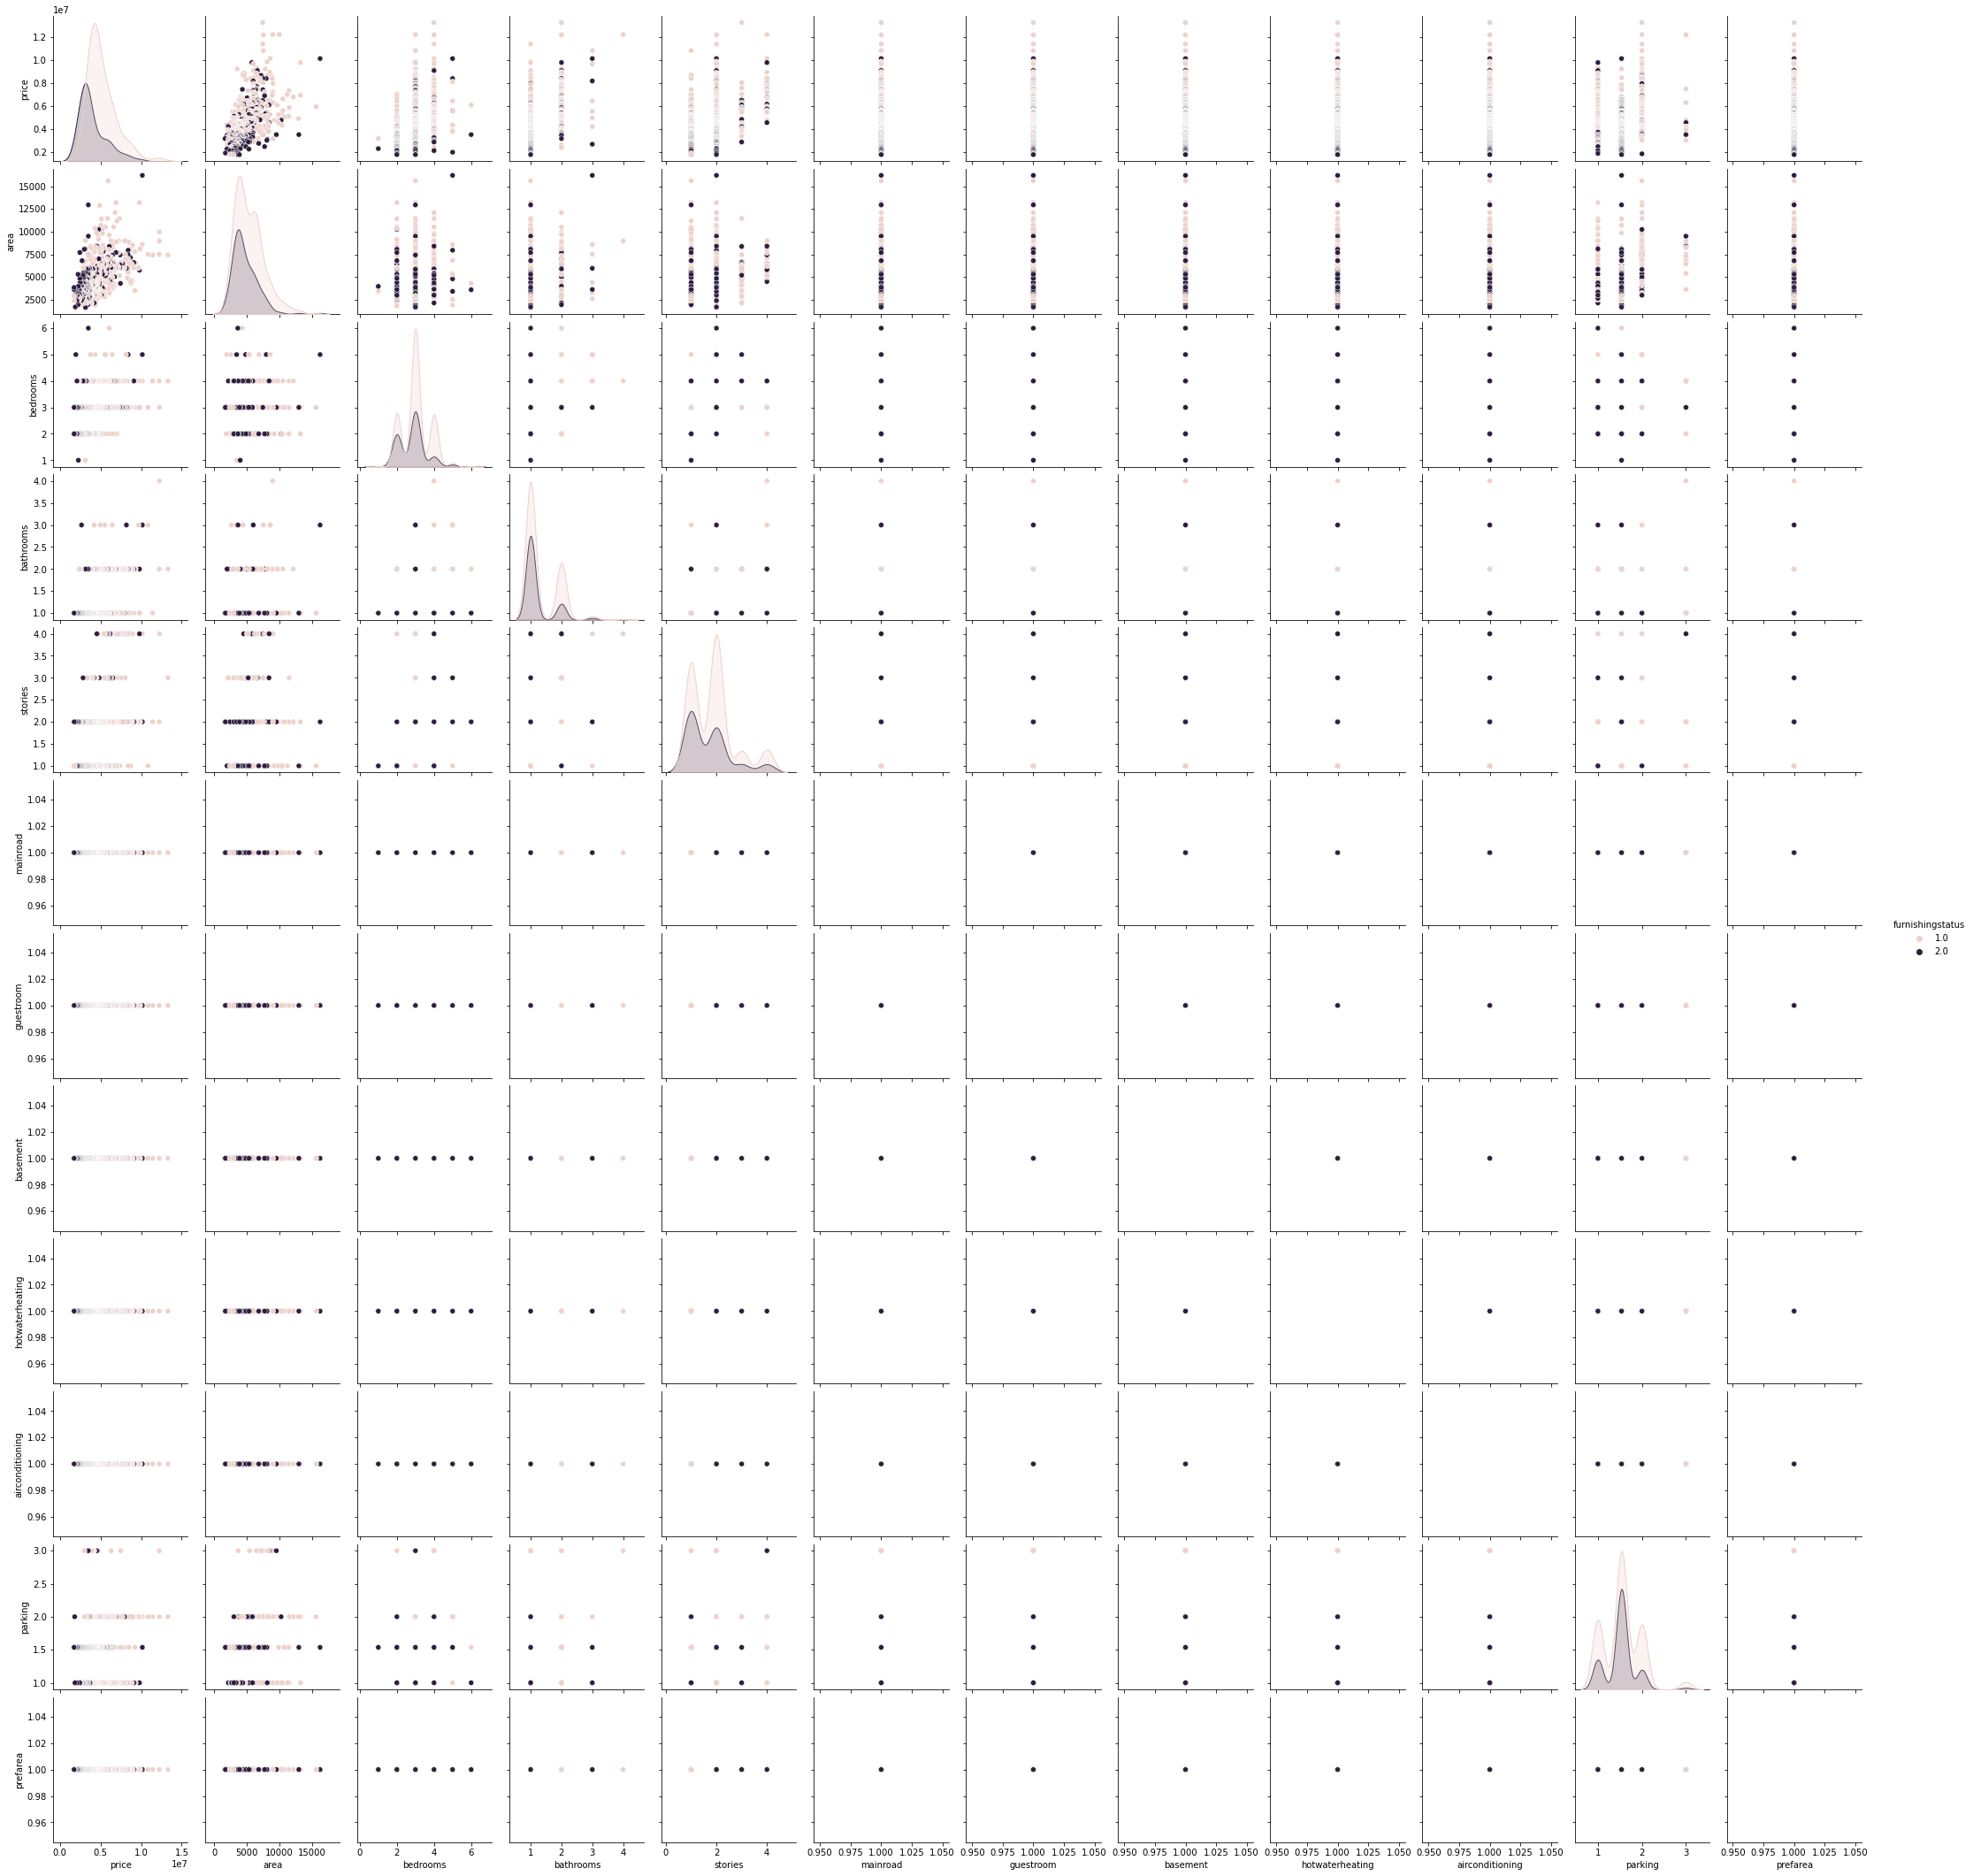

In [18]:
import seaborn as sns
p=sns.pairplot(data_copy, hue = 'furnishingstatus')

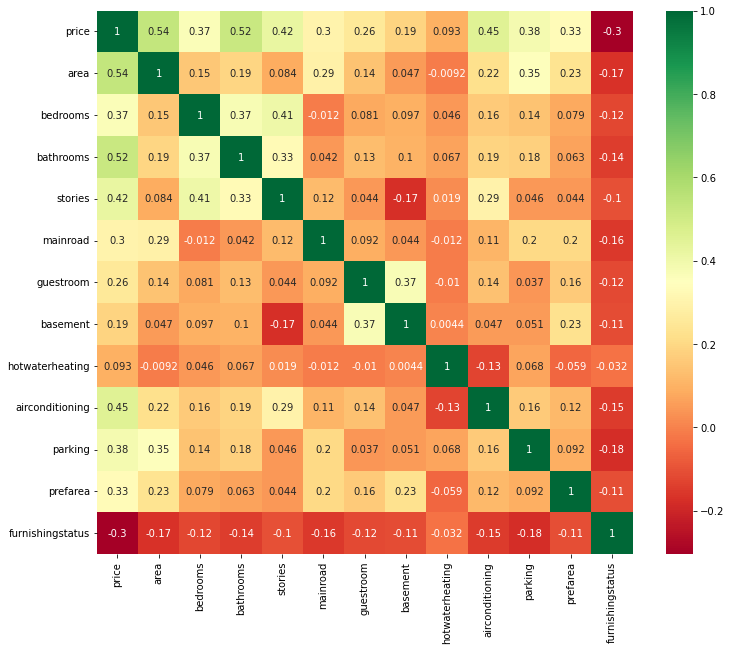

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

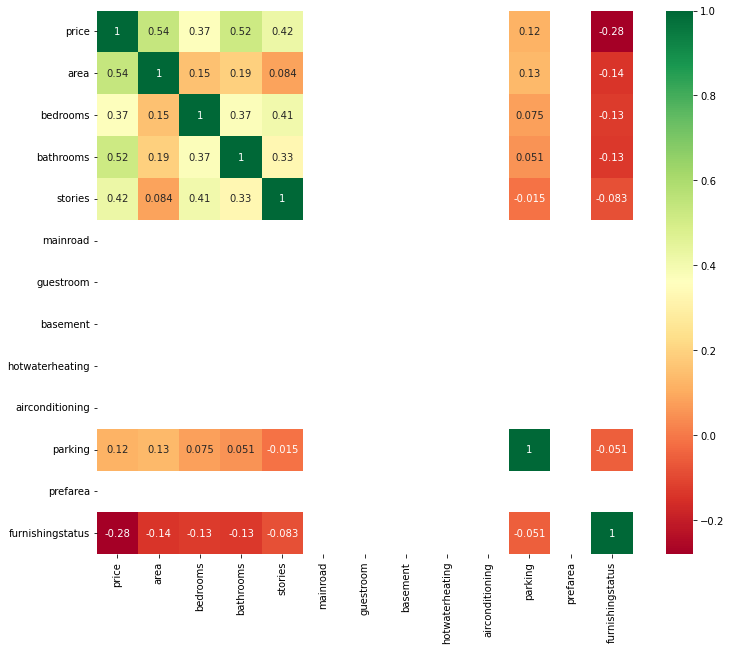

In [20]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data.drop(["furnishingstatus"], axis =1),),columns=['price', 'area', 'bedrooms', 'bathrooms', 'stories',
       'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'])
X.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035


In [22]:
y =data_copy.furnishingstatus

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42, stratify=y)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [25]:
max_test_score =max(test_scores)

In [26]:
test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 70.87912087912088 % and k = [5]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


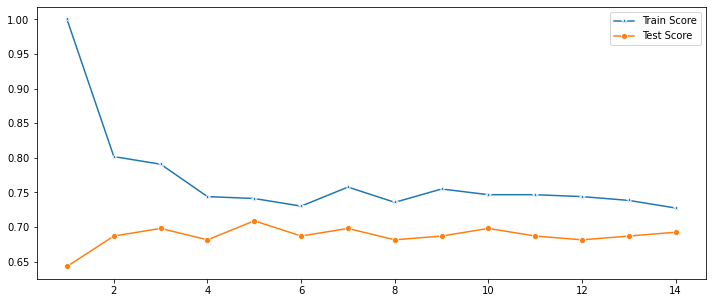

In [27]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [28]:

#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6868131868131868

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 15.0, 'Predicted label')

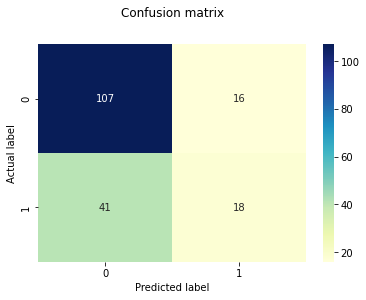

In [31]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.686813,0.722973,0.869919,0.789668,0.835937


In [33]:
# Alternate way
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.72      0.87      0.79       123
         2.0       0.53      0.31      0.39        59

    accuracy                           0.69       182
   macro avg       0.63      0.59      0.59       182
weighted avg       0.66      0.69      0.66       182



In [39]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,-1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba, pos_label=2.0)


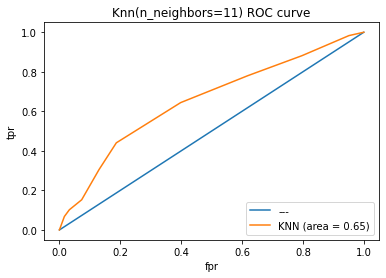

In [40]:
classifier_roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], label = "---")
 
plt.plot(fpr, tpr, label ='KNN (area = %0.2f)' % classifier_roc_auc)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('Knn(n_neighbors=11) ROC curve')
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV
parameters_grid = {"n_neighbors": np.arange(0,50)}
knn= KNeighborsClassifier()
knn_GSV = GridSearchCV(knn, param_grid=parameters_grid, cv = 5)
knn_GSV.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 514, in _fit
    raise ValueError(
ValueError: Expected n_neighbors > 0. Got 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Det

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [42]:
print("Best Params" ,knn_GSV.best_params_)
print("Best score" ,knn_GSV.best_score_)

Best Params {'n_neighbors': 24}
Best score 0.6697247706422019
